# **001 Importing Dependencies**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [4]:
print(Y_train.shape, Y_test.shape)

(50000, 1) (10000, 1)


In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
# Reshaping Y_train
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
def plot_sample(X,Y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[Y[index]])

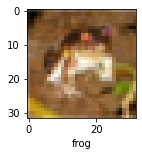

In [9]:
plot_sample(X_train,Y_train,0)

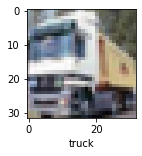

In [10]:
plot_sample(X_train,Y_train,1)

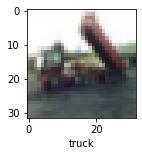

In [11]:
plot_sample(X_train,Y_train,2)

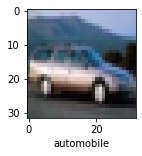

In [12]:
plot_sample(X_train,Y_train,4)

In [13]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

# **002 Scaling X_train values**

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(
    optimizer = 'SGD',
    loss ='sparse_categorical_crossentropy',             #if Y is one hot encoded then use 'categorical cross entropy' otherwise 'sparse categorical crossentropy'
    metrics = ['accuracy']
)

ann.fit(X_train,Y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 8s 3ms/step - loss: 1.8128 - accuracy: 0.3529
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6231 - accuracy: 0.4280
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5417 - accuracy: 0.4576
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4807 - accuracy: 0.4772
Epoch 5/50
1563/1563 [==============================] - 5s 4ms/step - loss: 1.4320 - accuracy: 0.4964
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3883 - accuracy: 0.5135
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3509 - accuracy: 0.5246
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3177 - accuracy: 0.5365
Epoch 9/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2831 - accuracy: 0.5503
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.252

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
Y_pred = ann.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print('classification Report: \n', classification_report(Y_test,Y_pred_classes))

313/313 [==============================] - 1s 2ms/step
classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.84      0.57      1000
           1       0.61      0.77      0.68      1000
           2       0.47      0.47      0.47      1000
           3       0.36      0.44      0.40      1000
           4       0.53      0.41      0.46      1000
           5       0.47      0.44      0.45      1000
           6       0.74      0.49      0.59      1000
           7       0.74      0.52      0.61      1000
           8       0.84      0.46      0.60      1000
           9       0.63      0.59      0.61      1000

    accuracy                           0.54     10000
   macro avg       0.58      0.54      0.54     10000
weighted avg       0.58      0.54      0.54     10000



# **003 Making CNN Layer**

In [18]:
cnn = keras.Sequential([
    #cnn layers
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),                      #convulation layer-----detecting features
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    #dense network
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',             #if Y is one hot encoded then use 'categorical cross entropy' otherwise 'sparse categorical crossentropy'
    metrics = ['accuracy']
)
cnn.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4983 - accuracy: 0.4616
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1554 - accuracy: 0.5942
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0381 - accuracy: 0.6370
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9611 - accuracy: 0.6629
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9048 - accuracy: 0.6852
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8574 - accuracy: 0.6993
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8152 - accuracy: 0.7158
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7780 - accuracy: 0.7298
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7440 - accuracy: 0.7404
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.710

In [19]:
# Model Evaluation
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1107 - accuracy: 0.6755


[1.1107057332992554, 0.6754999756813049]

In [20]:
Y_test = Y_test.reshape(-1,)
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

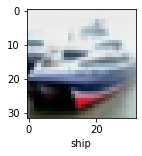

In [21]:
plot_sample(X_test,Y_test,1)

In [22]:
Y_pred = cnn.predict(X_test)
Y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[6.2083476e-04, 5.6396237e-07, 7.1503518e-06, 9.1945410e-01,
        7.3855961e-07, 5.7418600e-02, 2.0284485e-02, 3.8150429e-09,
        2.2125116e-03, 1.0848311e-06],
       [4.6613687e-03, 5.7193004e-03, 1.0636056e-08, 2.2083344e-11,
        1.0951253e-10, 3.5188898e-13, 2.0255887e-15, 1.8122937e-15,
        9.8960614e-01, 1.3228097e-05],
       [7.2841281e-03, 1.0514259e-01, 9.3469146e-04, 1.2925733e-04,
        1.7960405e-05, 2.7525713e-04, 2.3430752e-05, 2.2153345e-05,
        8.8540149e-01, 7.6900655e-04],
       [9.6920615e-01, 1.3829966e-04, 1.7605096e-02, 7.0740040e-05,
        1.2076990e-05, 4.9287600e-08, 2.2507029e-06, 7.6644135e-10,
        1.2963853e-02, 1.4862625e-06],
       [1.0750931e-10, 6.5408663e-06, 1.3519943e-02, 1.2416026e-02,
        2.3325559e-01, 1.5689802e-04, 7.4064493e-01, 1.4116484e-09,
        1.2206074e-07, 4.9000617e-09]], dtype=float32)

In [23]:
Y_classes = [np.argmax(element) for element in Y_pred]
Y_classes[:20]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 6, 5, 3, 8, 6]

In [24]:
Y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
Y_pred = cnn.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print('classification Report: \n', classification_report(Y_test,Y_pred_classes))

313/313 [==============================] - 1s 2ms/step
classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.76      0.69      1000
           1       0.78      0.82      0.80      1000
           2       0.58      0.57      0.57      1000
           3       0.50      0.41      0.45      1000
           4       0.62      0.63      0.62      1000
           5       0.55      0.58      0.57      1000
           6       0.75      0.75      0.75      1000
           7       0.72      0.72      0.72      1000
           8       0.82      0.77      0.79      1000
           9       0.78      0.75      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.67      0.68      0.67     10000
weighted avg       0.67      0.68      0.67     10000



# **padding and stride**

In [26]:
cnn = keras.Sequential([
    #cnn layers
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),padding='same', activation='relu', input_shape=(32,32,3)),               #padding=valid vs same       #convulation layer-----detecting features
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    #dense network
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',             #if Y is one hot encoded then use 'categorical cross entropy' otherwise 'sparse categorical crossentropy'
    metrics = ['accuracy']
)
cnn.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4514 - accuracy: 0.4787
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0864 - accuracy: 0.6191
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9582 - accuracy: 0.6666
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8778 - accuracy: 0.6942
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8191 - accuracy: 0.7145
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7711 - accuracy: 0.7301
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7270 - accuracy: 0.7476
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6814 - accuracy: 0.7618
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6477 - accuracy: 0.7722
Epoch 10/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.614

In [27]:
# Model Evaluation
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2262 - accuracy: 0.6835


[1.2262251377105713, 0.6834999918937683]

In [28]:
Y_test = Y_test.reshape(-1,)
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

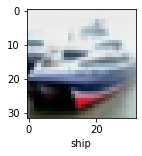

In [29]:
plot_sample(X_test,Y_test,1)

In [30]:
Y_pred = cnn.predict(X_test)
Y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[9.44400938e-07, 3.86423380e-06, 5.84144436e-06, 7.62889981e-01,
        9.18384956e-07, 2.36940935e-01, 1.52354711e-04, 8.36986018e-08,
        4.20137621e-06, 9.11913560e-07],
       [1.53591289e-04, 1.15999505e-02, 3.76643465e-12, 6.15638096e-11,
        3.68860801e-12, 1.63260586e-13, 1.45253096e-15, 2.08648726e-16,
        9.88241494e-01, 4.90193133e-06],
       [2.86226451e-01, 5.29109780e-03, 4.42896533e-04, 5.41374553e-04,
        1.09007979e-05, 1.27072781e-06, 4.48437248e-07, 3.71823189e-05,
        6.87334716e-01, 2.01136302e-02],
       [1.99830160e-02, 1.53535780e-06, 6.72385795e-07, 3.08571980e-05,
        3.71043325e-06, 1.73423276e-09, 4.09112140e-08, 8.77389217e-10,
        9.79979753e-01, 4.93378309e-07],
       [3.41278756e-08, 3.15685943e-03, 3.18966224e-04, 1.19202390e-01,
        2.73111612e-01, 4.08178836e-04, 6.03676558e-01, 4.45168924e-09,
        1.24809900e-04, 5.93852803e-07]], dtype=float32)

In [31]:
Y_classes = [np.argmax(element) for element in Y_pred]
Y_classes[:20]

[3, 8, 8, 8, 6, 6, 9, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 9, 8, 6]

In [32]:
Y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
Y_pred = cnn.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print('classification Report: \n', classification_report(Y_test,Y_pred_classes))

313/313 [==============================] - 1s 3ms/step
classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.65      0.71      1000
           1       0.83      0.73      0.78      1000
           2       0.61      0.53      0.57      1000
           3       0.50      0.54      0.52      1000
           4       0.64      0.64      0.64      1000
           5       0.59      0.60      0.59      1000
           6       0.75      0.74      0.74      1000
           7       0.74      0.74      0.74      1000
           8       0.75      0.84      0.79      1000
           9       0.68      0.83      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

